# Bike Sharing using Multiple Linear Regression

#### Problem Statement:

Our client company, BoomBikes wants to understand the demand for bikes among people during the current times. They would want to understand the factors on which the demand for these bikes depend. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

Essentially, the company wants to know —


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands

## Reading and Understanding the Data

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

In [49]:
data = pd.read_csv("day.csv")

In [50]:
# Check the head of the dataset
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [8]:
data.shape

(730, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Visualising the Data

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

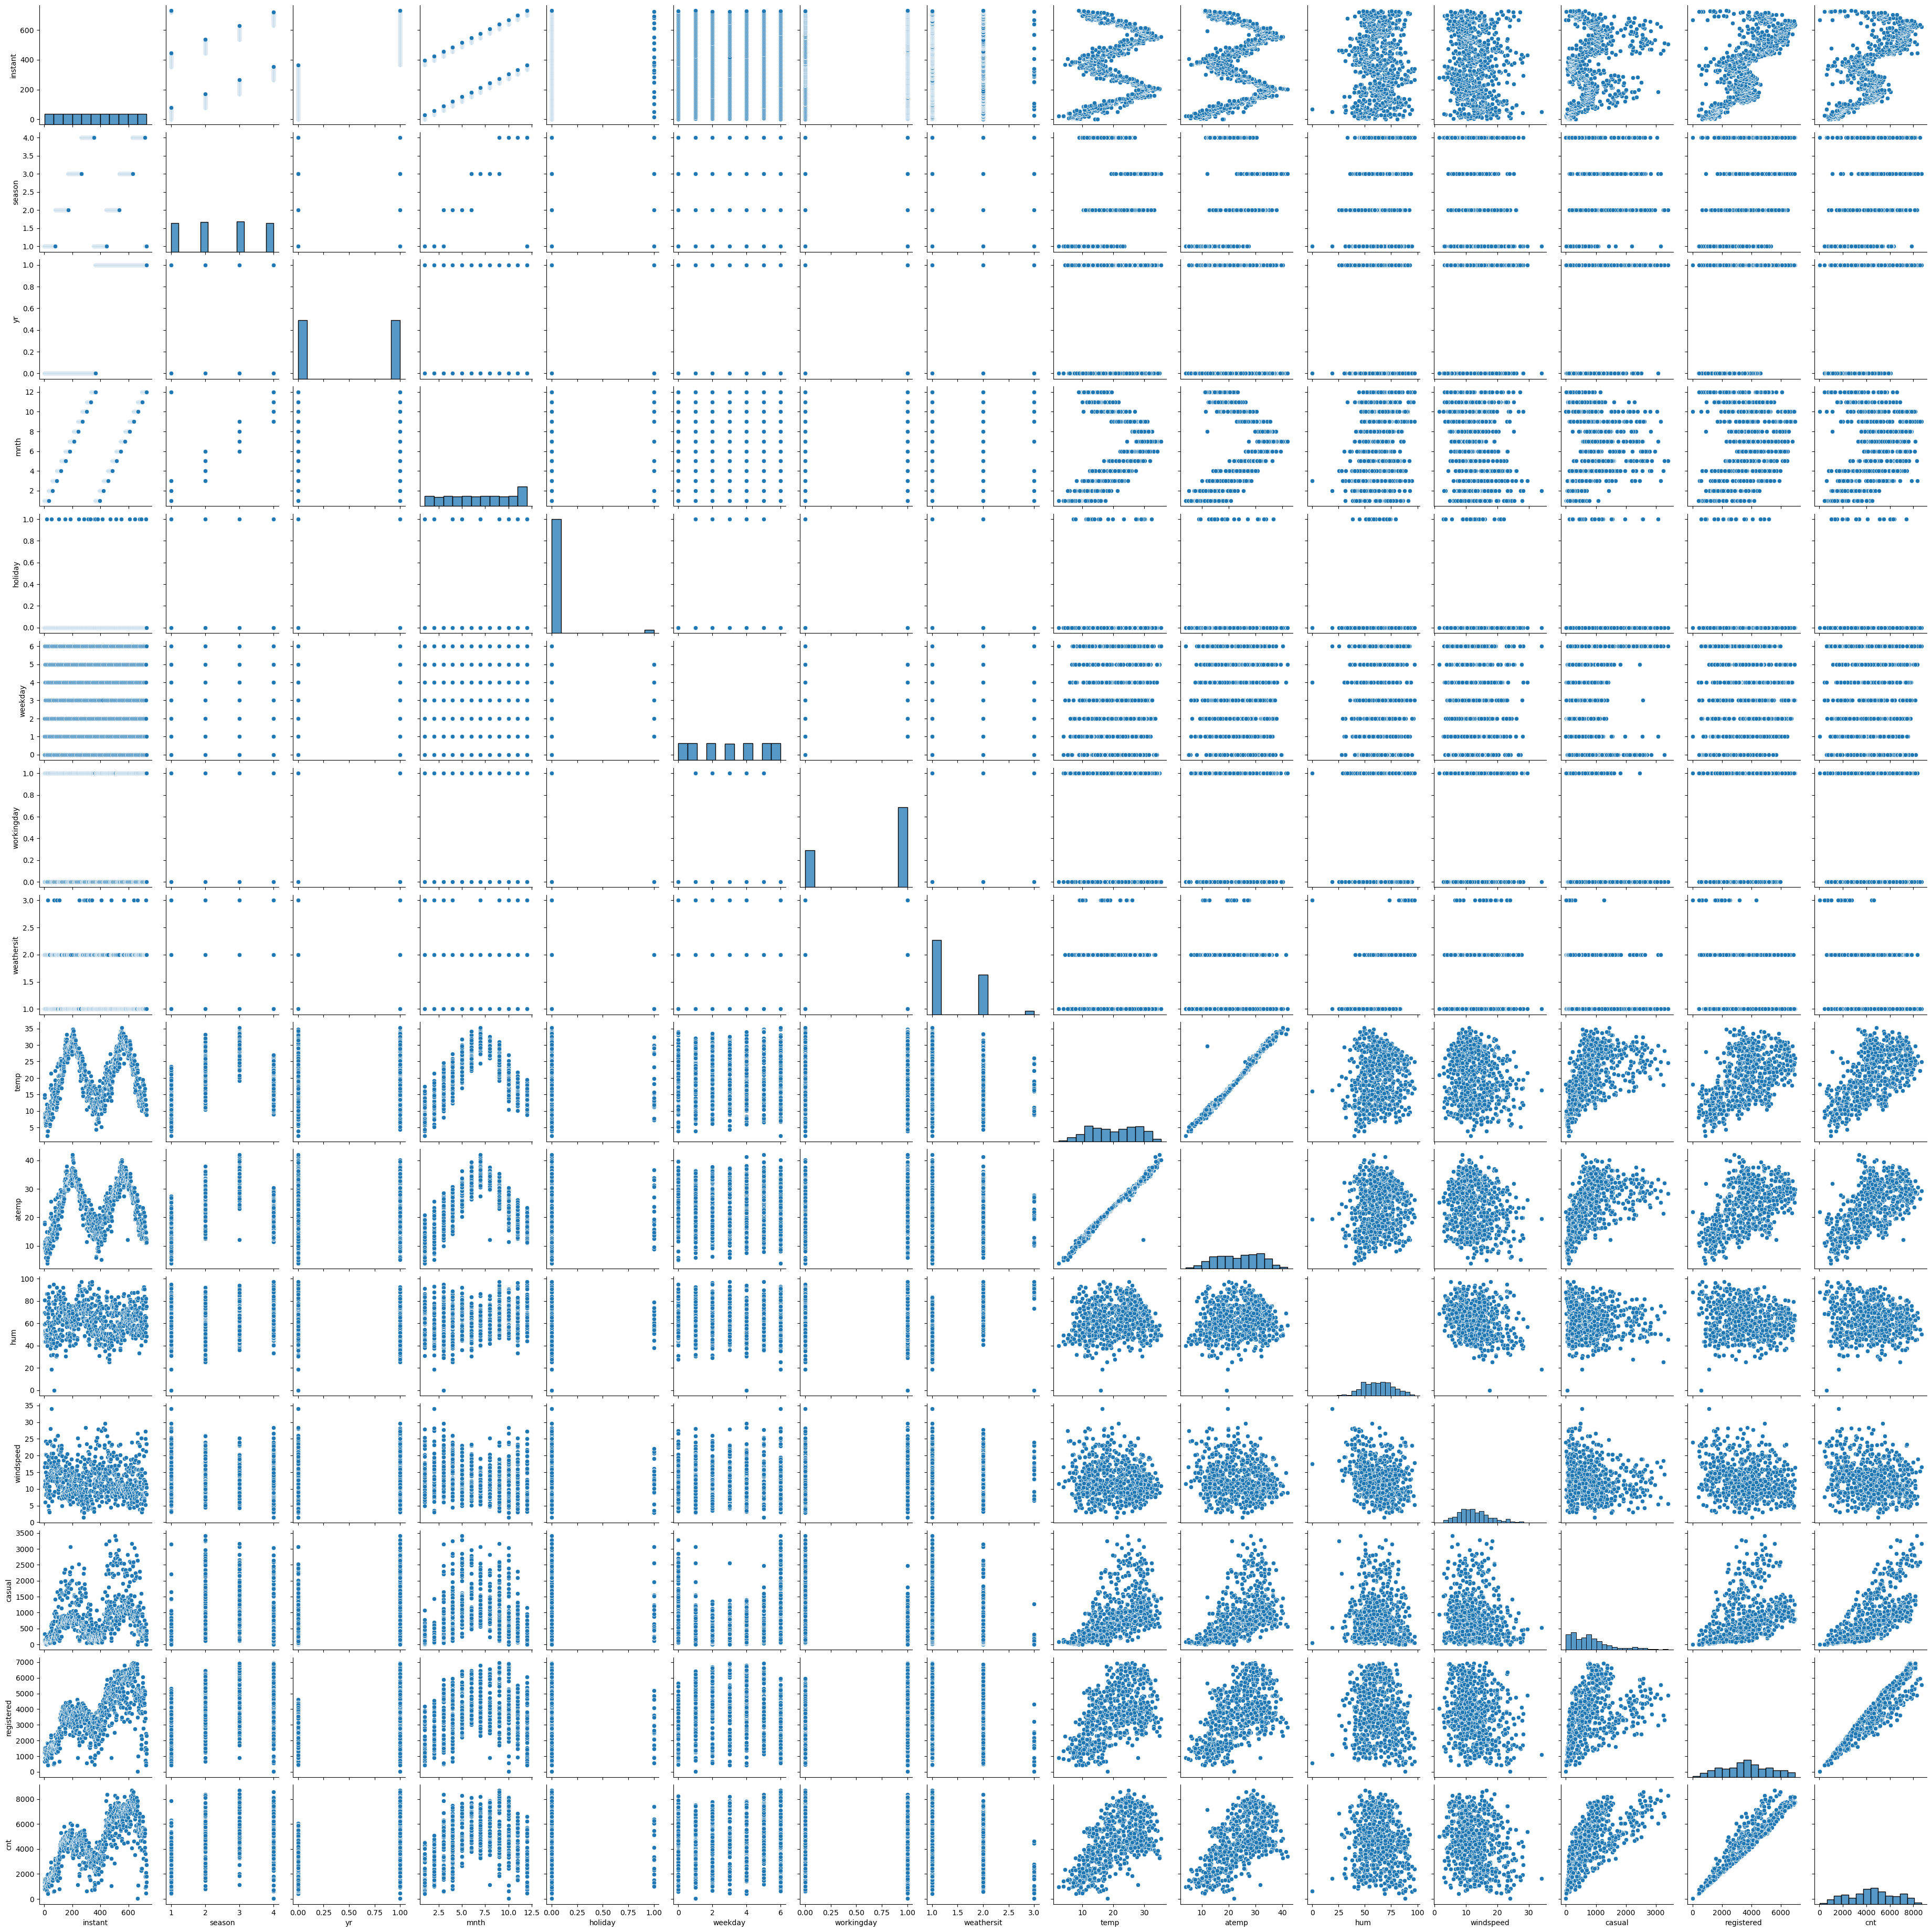

In [51]:
sns.pairplot(data)
plt.show()
#there are too many numeric variables, so this visualisation might not be the perfect way to check the values

In [52]:
data[['weathersit', 'season']].head()

weathersit  season
0           2       1
1           2       1
2           1       1
3           1       1
4           1       1

In [53]:
#Converting the data in columns 'weathersit' and 'season' into categorical values
data['weathersit'] = data['weathersit'].replace({1: 'cloudy', 2: 'misty', 3: 'light_rain', 4: 'thunderstorm'})
data['season'] = data['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['season'].head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

#### Visualising Categorical Variables

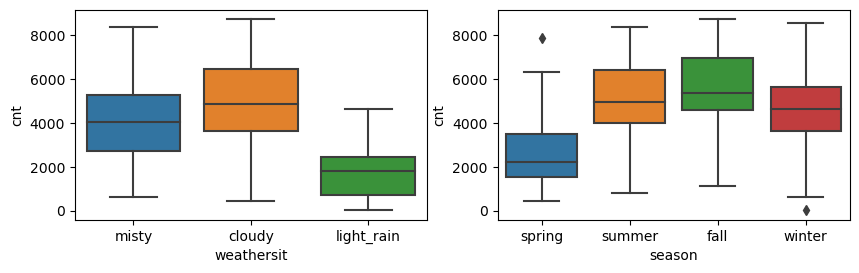

In [54]:
plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,2,2)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.show()

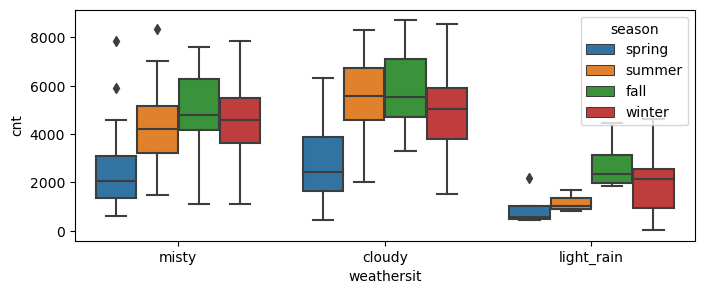

In [55]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'season', data = data)
plt.show()

In [56]:
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  spring   0     1        0        6           0   
1        2  02-01-2018  spring   0     1        0        0           0   
2        3  03-01-2018  spring   0     1        0        1           1   
3        4  04-01-2018  spring   0     1        0        2           1   
4        5  05-01-2018  spring   0     1        0        3           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0      misty  14.110847  18.18125  80.5833  10.749882     331         654   
1      misty  14.902598  17.68695  69.6087  16.652113     131         670   
2     cloudy   8.050924   9.47025  43.7273  16.636703     120        1229   
3     cloudy   8.200000  10.60610  59.0435  10.739832     108        1454   
4     cloudy   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [68]:
#Removing the date field
date = data[['dteday']]
data.pop('dteday')

In [69]:
date.head()

dteday
0  01-01-2018
1  02-01-2018
2  03-01-2018
3  04-01-2018
4  05-01-2018

In [70]:
data.head()

instant  season  yr  mnth  holiday  weekday  workingday weathersit  \
0        1  spring   0     1        0        6           0      misty   
1        2  spring   0     1        0        0           0      misty   
2        3  spring   0     1        0        1           1     cloudy   
3        4  spring   0     1        0        2           1     cloudy   
4        5  spring   0     1        0        3           1     cloudy   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

## Data Preparation

- All the columns apart from season and weathersit are in numerical terms.
- So we will need to use some dummy variables to get a numerical value corresponding to these categorical variables

### Dummy Variables

The variable `season` has four levels. We need to convert these levels into integer as well.

In [88]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_value'
season_value = pd.get_dummies(data['season'])
season_value.head(200)

fall  spring  summer  winter
0       0       1       0       0
1       0       1       0       0
2       0       1       0       0
3       0       1       0       0
4       0       1       0       0
..    ...     ...     ...     ...
195     1       0       0       0
196     1       0       0       0
197     1       0       0       0
198     1       0       0       0
199     1       0       0       0

[200 rows x 4 columns]

In [90]:
season_value.head(500)

fall  spring  summer  winter
0       0       1       0       0
1       0       1       0       0
2       0       1       0       0
3       0       1       0       0
4       0       1       0       0
..    ...     ...     ...     ...
495     0       0       1       0
496     0       0       1       0
497     0       0       1       0
498     0       0       1       0
499     0       0       1       0

[500 rows x 4 columns]

In [91]:
season_value.head(700)

fall  spring  summer  winter
0       0       1       0       0
1       0       1       0       0
2       0       1       0       0
3       0       1       0       0
4       0       1       0       0
..    ...     ...     ...     ...
695     0       0       0       1
696     0       0       0       1
697     0       0       0       1
698     0       0       0       1
699     0       0       0       1

[700 rows x 4 columns]

I'll be dropping the `fall` column, as the type of season can be identified with just the last three columns where — 
- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [93]:
# Let's drop the first column from season_value using 'drop_first = True'
season_value = pd.get_dummies(data['season'], drop_first = True)

In [94]:
# Add the results to the original dataset
data = pd.concat([data, season_value], axis = 1)
data.head()

instant  season  yr  mnth  holiday  weekday  workingday weathersit  \
0        1  spring   0     1        0        6           0      misty   
1        2  spring   0     1        0        0           0      misty   
2        3  spring   0     1        0        1           1     cloudy   
3        4  spring   0     1        0        2           1     cloudy   
4        5  spring   0     1        0        3           1     cloudy   

        temp     atemp      hum  windspeed  casual  registered   cnt  spring  \
0  14.110847  18.18125  80.5833  10.749882     331         654   985       1   
1  14.902598  17.68695  69.6087  16.652113     131         670   801       1   
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349       1   
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562       1   
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600       1   

   summer  winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0

In [95]:
# Drop 'season' as we have created the dummies for it
data.drop(['season'], axis = 1, inplace = True)
data.head()

instant  yr  mnth  holiday  weekday  workingday weathersit       temp  \
0        1   0     1        0        6           0      misty  14.110847   
1        2   0     1        0        0           0      misty  14.902598   
2        3   0     1        0        1           1     cloudy   8.050924   
3        4   0     1        0        2           1     cloudy   8.200000   
4        5   0     1        0        3           1     cloudy   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  spring  summer  \
0  18.18125  80.5833  10.749882     331         654   985       1       0   
1  17.68695  69.6087  16.652113     131         670   801       1       0   
2   9.47025  43.7273  16.636703     120        1229  1349       1       0   
3  10.60610  59.0435  10.739832     108        1454  1562       1       0   
4  11.46350  43.6957  12.522300      82        1518  1600       1       0   

   winter  
0       0  
1       0  
2       0  
3       0  
4       0

###### Similarly we will modify weathersit column as well

In [98]:
weather_value = pd.get_dummies(data['weathersit'])
weather_value.head(200)

cloudy  light_rain  misty
0         0           0      1
1         0           0      1
2         1           0      0
3         1           0      0
4         1           0      0
..      ...         ...    ...
195       1           0      0
196       1           0      0
197       1           0      0
198       1           0      0
199       1           0      0

[200 rows x 3 columns]

I'll be dropping the `cloudy` column, as the type of weather can be identified with just the other two columns where — 
- `00` will correspond to `cloudy`
- `10` will correspond to `light_rain`
- `01` will correspond to `misty`

In [99]:
# Let's drop the first column from weather_value using 'drop_first = True'
weather_value = pd.get_dummies(data['weathersit'], drop_first = True)

In [100]:
# Add the results to the original dataset
data = pd.concat([data, weather_value], axis = 1)
data.head()

instant  yr  mnth  holiday  weekday  workingday weathersit       temp  \
0        1   0     1        0        6           0      misty  14.110847   
1        2   0     1        0        0           0      misty  14.902598   
2        3   0     1        0        1           1     cloudy   8.050924   
3        4   0     1        0        2           1     cloudy   8.200000   
4        5   0     1        0        3           1     cloudy   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  spring  summer  \
0  18.18125  80.5833  10.749882     331         654   985       1       0   
1  17.68695  69.6087  16.652113     131         670   801       1       0   
2   9.47025  43.7273  16.636703     120        1229  1349       1       0   
3  10.60610  59.0435  10.739832     108        1454  1562       1       0   
4  11.46350  43.6957  12.522300      82        1518  1600       1       0   

   winter  light_rain  misty  
0       0           0      1  
1       0           0      1  
2       0           0      0  
3       0           0      0  
4       0           0      0

In [101]:
# Drop 'weathersit' as we have created the dummies for it
data.drop(['weathersit'], axis = 1, inplace = True)
data.head()

instant  yr  mnth  holiday  weekday  workingday       temp     atemp  \
0        1   0     1        0        6           0  14.110847  18.18125   
1        2   0     1        0        0           0  14.902598  17.68695   
2        3   0     1        0        1           1   8.050924   9.47025   
3        4   0     1        0        2           1   8.200000  10.60610   
4        5   0     1        0        3           1   9.305237  11.46350   

       hum  windspeed  casual  registered   cnt  spring  summer  winter  \
0  80.5833  10.749882     331         654   985       1       0       0   
1  69.6087  16.652113     131         670   801       1       0       0   
2  43.7273  16.636703     120        1229  1349       1       0       0   
3  59.0435  10.739832     108        1454  1562       1       0       0   
4  43.6957  12.522300      82        1518  1600       1       0       0   

   light_rain  misty  
0           0      1  
1           0      1  
2           0      0  
3           0      0  
4           0      0

Now we have all the data in numerical format, so that we can proceed with creating our model

In [102]:
#Keeping a temporary dataset handy
temp = data
temp.head()

instant  yr  mnth  holiday  weekday  workingday       temp     atemp  \
0        1   0     1        0        6           0  14.110847  18.18125   
1        2   0     1        0        0           0  14.902598  17.68695   
2        3   0     1        0        1           1   8.050924   9.47025   
3        4   0     1        0        2           1   8.200000  10.60610   
4        5   0     1        0        3           1   9.305237  11.46350   

       hum  windspeed  casual  registered   cnt  spring  summer  winter  \
0  80.5833  10.749882     331         654   985       1       0       0   
1  69.6087  16.652113     131         670   801       1       0       0   
2  43.7273  16.636703     120        1229  1349       1       0       0   
3  59.0435  10.739832     108        1454  1562       1       0       0   
4  43.6957  12.522300      82        1518  1600       1       0       0   

   light_rain  misty  
0           0      1  
1           0      1  
2           0      0  
3           0      0  
4           0      0

## Splitting the Data into Training and Testing Sets

In [103]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [104]:
from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler = MinMaxScaler()

In [106]:
# Applying scaler() to all the columns except the boolean values and dummy variables
num_vars = ['mnth', 'weekday', 'temp', 'atemp', 'hum','windspeed','casual','registered','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [107]:
df_train.head()

instant  yr      mnth  holiday   weekday  workingday      temp     atemp  \
653      654   1  0.818182        0  0.333333           1  0.509887  0.501133   
576      577   1  0.545455        0  0.333333           1  0.815169  0.766351   
426      427   1  0.181818        0  1.000000           0  0.442393  0.438975   
728      729   1  1.000000        0  0.000000           0  0.245101  0.200348   
482      483   1  0.272727        0  1.000000           0  0.395666  0.391735   

          hum  windspeed    casual  registered       cnt  spring  summer  \
653  0.575354   0.300794  0.280402    0.951776  0.864243       0       0   
576  0.725633   0.264686  0.294422    0.899220  0.827658       0       0   
426  0.640189   0.255342  0.290765    0.446145  0.465255       1       0   
728  0.498067   0.663106  0.110332    0.203869  0.204096       1       0   
482  0.504508   0.188475  0.340750    0.444701  0.482973       0       1   

     winter  light_rain  misty  
653       1           0      0  
576       0           0      0  
426       0           0      1  
728       0           0      0  
482       0           0      1

In [108]:
df_train.describe()

instant          yr        mnth     holiday     weekday  workingday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean   368.941176    0.507843    0.504456    0.025490    0.498366    0.676471   
std    209.868619    0.500429    0.315338    0.157763    0.336182    0.468282   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    187.250000    0.000000    0.181818    0.000000    0.166667    0.000000   
50%    373.000000    1.000000    0.545455    0.000000    0.500000    1.000000   
75%    553.750000    1.000000    0.818182    0.000000    0.833333    1.000000   
max    729.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             temp       atemp         hum   windspeed      casual  registered  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.537262    0.512989    0.650369    0.320768    0.254661    0.523944   
std      0.225844    0.212385    0.145882    0.169797    0.206011    0.228175   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.339853    0.332086    0.538643    0.199179    0.094179    0.353487   
50%      0.540519    0.526811    0.653714    0.296763    0.212740    0.525123   
75%      0.735215    0.688457    0.754830    0.414447    0.327415    0.696073   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer     winter  light_rain       misty  
count  510.000000  510.000000  510.000000  510.00000  510.000000  510.000000  
mean     0.513620    0.243137    0.245098    0.24902    0.029412    0.343137  
std      0.224593    0.429398    0.430568    0.43287    0.169124    0.475223  
min      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000  
25%      0.356420    0.000000    0.000000    0.00000    0.000000    0.000000  
50%      0.518638    0.000000    0.000000    0.00000    0.000000    0.000000  
75%      0.684710    0.000000    0.000000    0.00000    0.000000    1.000000  
max      1.000000    1.000000    1.000000    1.00000    1.000000    1.000000

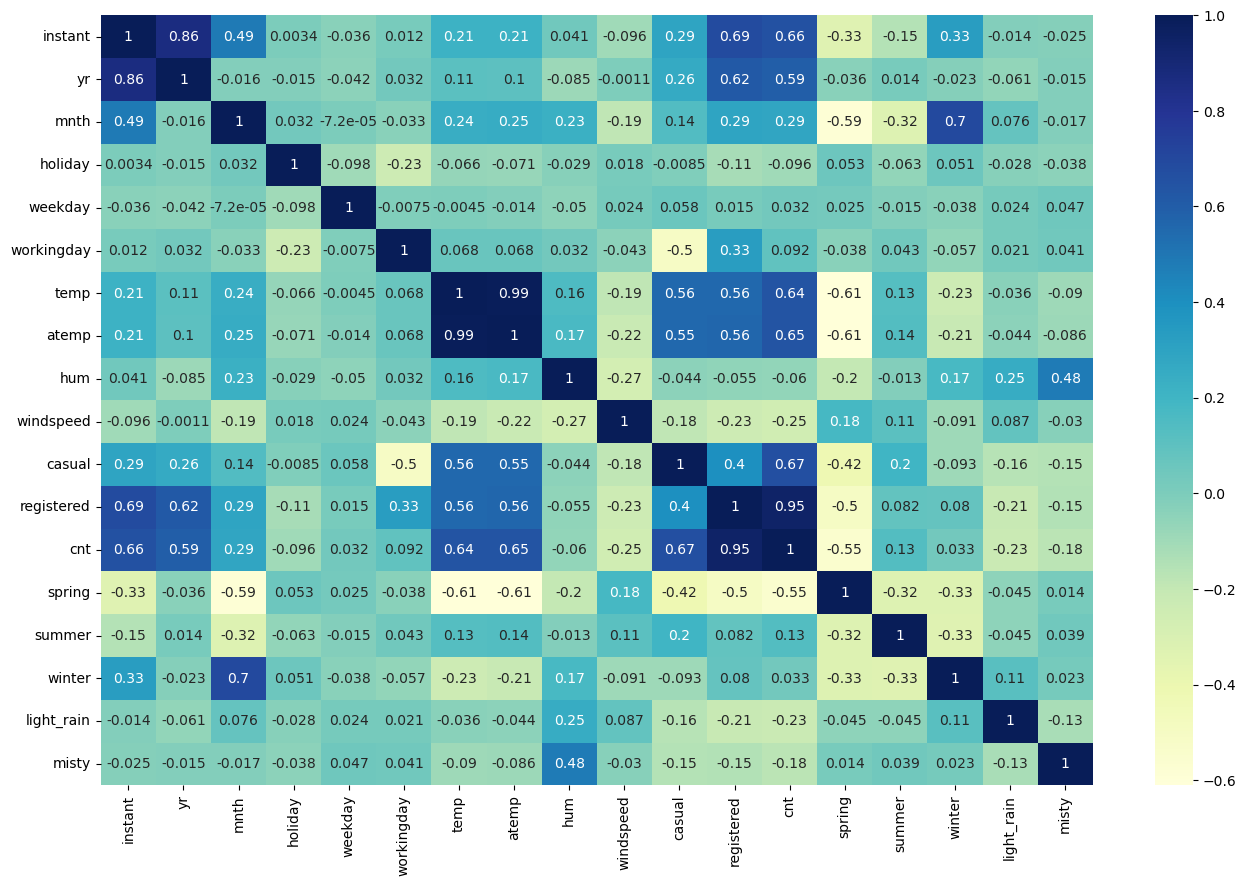

In [109]:
# Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

`registered` and `casual` seems to the correlated to `cnt` the most. But since those two are getting summed up to produce `cnt`, using them for analysis wouldn't be that useful. So the next highest correlation for `cnt` would be for `temp`, `atemp` and `yr`

We will consider `atemp` for initial analysis and find the correlation

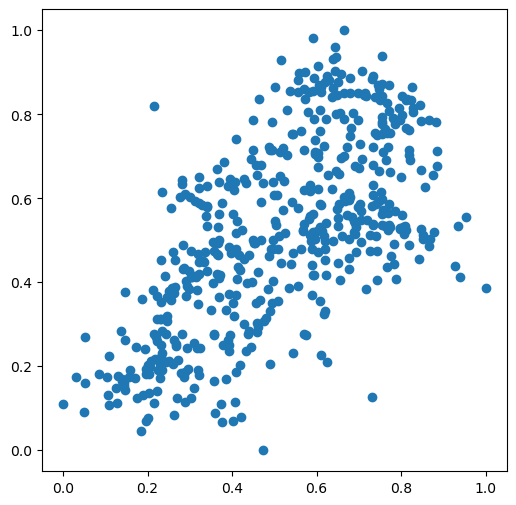

In [110]:
#Creating a pairplot for atemp vs cnt
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

So, we pick `atemp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [111]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building a linear model

In [113]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train[['atemp']])

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.162924
atemp    0.683633
dtype: float64

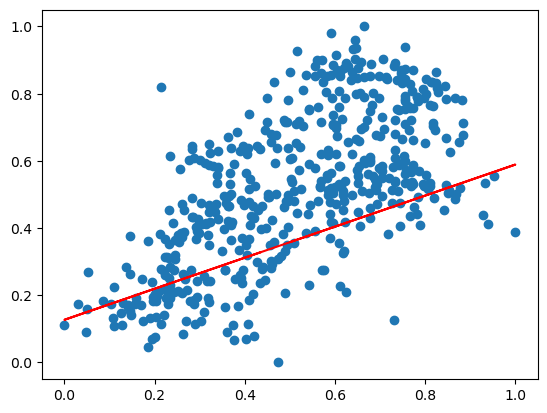

In [114]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [115]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           1.10e-61
Time:                        19:26:46   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

### Adding another variable

The R-squared value obtained is `0.418`. To improve this, we will keep adding other variables. The next highest correlation was for `temp`

In [116]:
X_train_lm = X_train[['atemp', 'temp']]

In [117]:
# Building the linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.163383
atemp    0.492316
temp     0.181818
dtype: float64

In [118]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           1.95e-60
Time:                        19:28:52   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.0

There doesn't seem to be much improvement in the R-square value, probably due to the fact that `temp` and `atemp` are very much in comparable values, and one is related to the other. So we will use the next best factor for analysis `yr`

In [119]:
X_train_lm = X_train[['atemp', 'temp', 'yr']]

In [120]:
# Building another linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072352
atemp    0.545027
temp     0.076265
yr       0.237672
dtype: float64

In [122]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     385.8
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          2.62e-130
Time:                        19:30:57   Log-Likelihood:                 341.97
No. Observations:                 510   AIC:                            -675.9
Df Residuals:                     506   BIC:                            -659.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0724      0.015      4.820      0.0

This seems to have improved the R-squared value from `0.419` to `0.696`. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [127]:
data.columns

Index(['instant', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'spring',
       'summer', 'winter', 'light_rain', 'misty'],
      dtype='object')

In [128]:
#Building a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const        -1.498801e-15
instant       3.252607e-18
yr            3.330669e-16
mnth          3.330669e-16
holiday      -4.163336e-17
weekday      -2.463307e-16
workingday    2.567391e-16
temp          4.996004e-16
atemp        -1.110223e-15
hum           3.053113e-16
windspeed     1.110223e-16
casual        3.774735e-01
registered    7.968247e-01
spring        1.179612e-16
summer       -3.261280e-16
winter        2.983724e-16
light_rain   -3.352353e-16
misty         1.360674e-16
dtype: float64

In [129]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.497e+30
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:55:27   Log-Likelihood:                 16898.
No. Observations:                 510   AIC:                        -3.376e+04
Df Residuals:                     492   BIC:                        -3.368e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.499e-15   4.42e-16     -3.393      0.0

###### There seems to be multicollinearity between different columns, one obvious one here would be `atemp` and `temp`. So we will drop `atemp` from the dataset. Also the column `instant` is only showing the column number, which doesn't provide any useful info. So we will be removing that as well

In [132]:
data.drop(['atemp'], axis = 1, inplace = True)
data.head()

instant  yr  mnth  holiday  weekday  workingday       temp      hum  \
0        1   0     1        0        6           0  14.110847  80.5833   
1        2   0     1        0        0           0  14.902598  69.6087   
2        3   0     1        0        1           1   8.050924  43.7273   
3        4   0     1        0        2           1   8.200000  59.0435   
4        5   0     1        0        3           1   9.305237  43.6957   

   windspeed  casual  registered   cnt  spring  summer  winter  light_rain  \
0  10.749882     331         654   985       1       0       0           0   
1  16.652113     131         670   801       1       0       0           0   
2  16.636703     120        1229  1349       1       0       0           0   
3  10.739832     108        1454  1562       1       0       0           0   
4  12.522300      82        1518  1600       1       0       0           0   

   misty  
0      1  
1      1  
2      0  
3      0  
4      0

In [133]:
data.drop(['instant'], axis = 1, inplace = True)

In [134]:
data.head()

yr  mnth  holiday  weekday  workingday       temp      hum  windspeed  \
0   0     1        0        6           0  14.110847  80.5833  10.749882   
1   0     1        0        0           0  14.902598  69.6087  16.652113   
2   0     1        0        1           1   8.050924  43.7273  16.636703   
3   0     1        0        2           1   8.200000  59.0435  10.739832   
4   0     1        0        3           1   9.305237  43.6957  12.522300   

   casual  registered   cnt  spring  summer  winter  light_rain  misty  
0     331         654   985       1       0       0           0      1  
1     131         670   801       1       0       0           0      1  
2     120        1229  1349       1       0       0           0      0  
3     108        1454  1562       1       0       0           0      0  
4      82        1518  1600       1       0       0           0      0

### Need to train the data again

In [145]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['mnth', 'weekday', 'temp',  'hum','windspeed','casual','registered','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

yr      mnth  holiday   weekday  workingday      temp       hum  \
653   1  0.818182        0  0.333333           1  0.509887  0.575354   
576   1  0.545455        0  0.333333           1  0.815169  0.725633   
426   1  0.181818        0  1.000000           0  0.442393  0.640189   
728   1  1.000000        0  0.000000           0  0.245101  0.498067   
482   1  0.272727        0  1.000000           0  0.395666  0.504508   

     windspeed    casual  registered       cnt  spring  summer  winter  \
653   0.300794  0.280402    0.951776  0.864243       0       0       1   
576   0.264686  0.294422    0.899220  0.827658       0       0       0   
426   0.255342  0.290765    0.446145  0.465255       1       0       0   
728   0.663106  0.110332    0.203869  0.204096       1       0       0   
482   0.188475  0.340750    0.444701  0.482973       0       1       0   

     light_rain  misty  
653           0      0  
576           0      0  
426           0      1  
728           0      0  
482           0      1

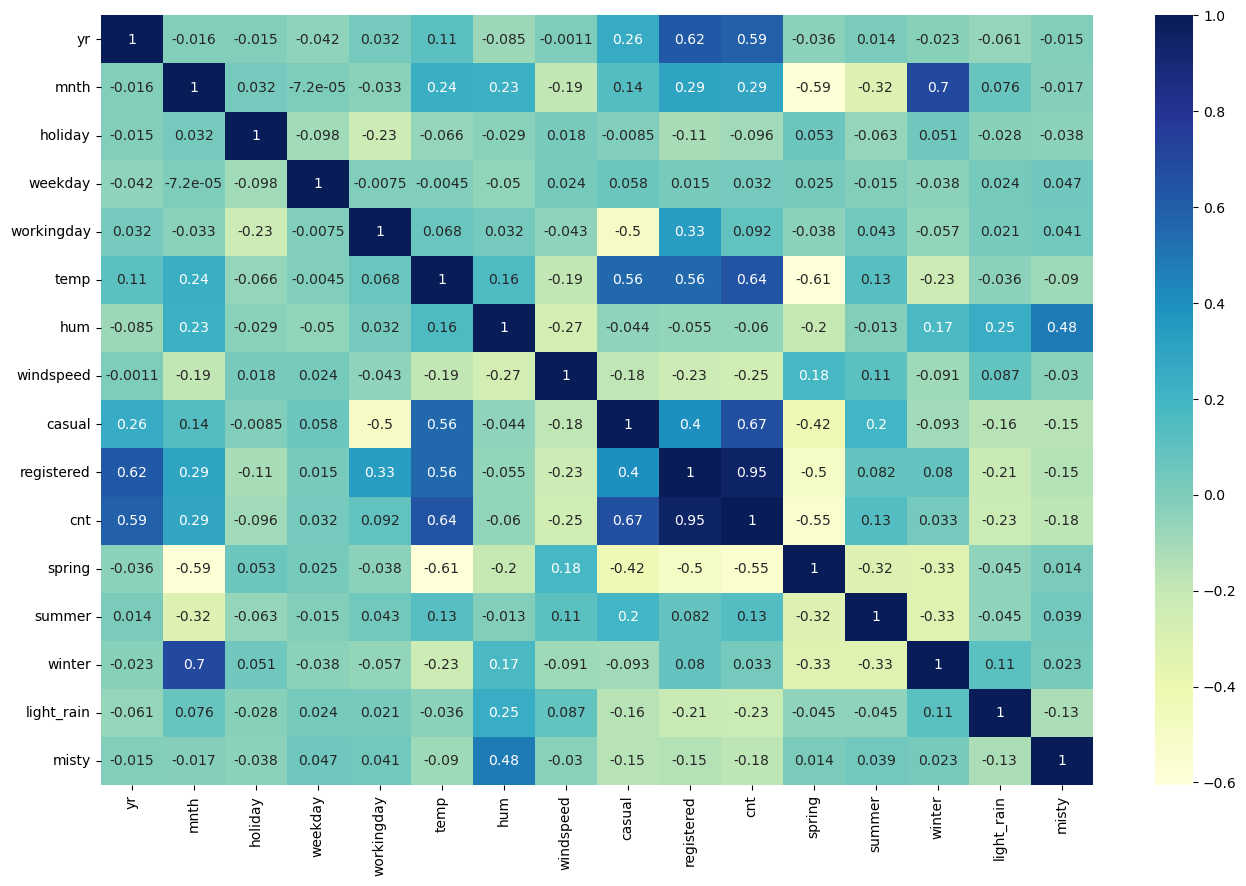

In [147]:
# Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [148]:
y_train = df_train.pop('cnt')
X_train = df_train

In [149]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         4.163336e-16
yr            7.112366e-16
mnth         -1.179612e-16
holiday       1.457168e-16
weekday      -2.844947e-16
workingday    9.089951e-16
temp         -2.414735e-15
hum           1.165734e-15
windspeed     2.636780e-16
casual        3.774735e-01
registered    7.968247e-01
spring       -9.020562e-16
summer       -5.828671e-16
winter       -5.898060e-16
light_rain   -6.314393e-16
misty        -9.714451e-17
dtype: float64

In [150]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.219e+30
Date:                Wed, 16 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:23:27   Log-Likelihood:                 17266.
No. Observations:                 510   AIC:                        -3.450e+04
Df Residuals:                     494   BIC:                        -3.443e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.163e-16   2.11e-16      1.974      0.0

Since the R-squared value is giving 1, there is some issue with the model. There is a factors `registered` and `casual` which have 0.95 and 0.65 correlations with target variable, so I'm removing those from the dataset.

In [153]:
temp2 = data

yr  mnth  holiday  weekday  workingday       temp      hum  windspeed  \
0   0     1        0        6           0  14.110847  80.5833  10.749882   
1   0     1        0        0           0  14.902598  69.6087  16.652113   
2   0     1        0        1           1   8.050924  43.7273  16.636703   
3   0     1        0        2           1   8.200000  59.0435  10.739832   
4   0     1        0        3           1   9.305237  43.6957  12.522300   

   casual  registered   cnt  spring  summer  winter  light_rain  misty  
0     331         654   985       1       0       0           0      1  
1     131         670   801       1       0       0           0      1  
2     120        1229  1349       1       0       0           0      0  
3     108        1454  1562       1       0       0           0      0  
4      82        1518  1600       1       0       0           0      0

In [ ]:
data.pop('registered')

In [165]:
temp3 = data

In [ ]:
data.pop('casual')

In [168]:
data.head()

yr  mnth  holiday  weekday  workingday       temp      hum  windspeed  \
0   0     1        0        6           0  14.110847  80.5833  10.749882   
1   0     1        0        0           0  14.902598  69.6087  16.652113   
2   0     1        0        1           1   8.050924  43.7273  16.636703   
3   0     1        0        2           1   8.200000  59.0435  10.739832   
4   0     1        0        3           1   9.305237  43.6957  12.522300   

    cnt  spring  summer  winter  light_rain  misty  
0   985       1       0       0           0      1  
1   801       1       0       0           0      1  
2  1349       1       0       0           0      0  
3  1562       1       0       0           0      0  
4  1600       1       0       0           0      0

In [169]:
# Training again
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [170]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['mnth', 'weekday', 'temp',  'hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

yr      mnth  holiday   weekday  workingday      temp       hum  \
653   1  0.818182        0  0.333333           1  0.509887  0.575354   
576   1  0.545455        0  0.333333           1  0.815169  0.725633   
426   1  0.181818        0  1.000000           0  0.442393  0.640189   
728   1  1.000000        0  0.000000           0  0.245101  0.498067   
482   1  0.272727        0  1.000000           0  0.395666  0.504508   

     windspeed       cnt  spring  summer  winter  light_rain  misty  
653   0.300794  0.864243       0       0       1           0      0  
576   0.264686  0.827658       0       0       0           0      0  
426   0.255342  0.465255       1       0       0           0      1  
728   0.663106  0.204096       1       0       0           0      0  
482   0.188475  0.482973       0       1       0           0      1

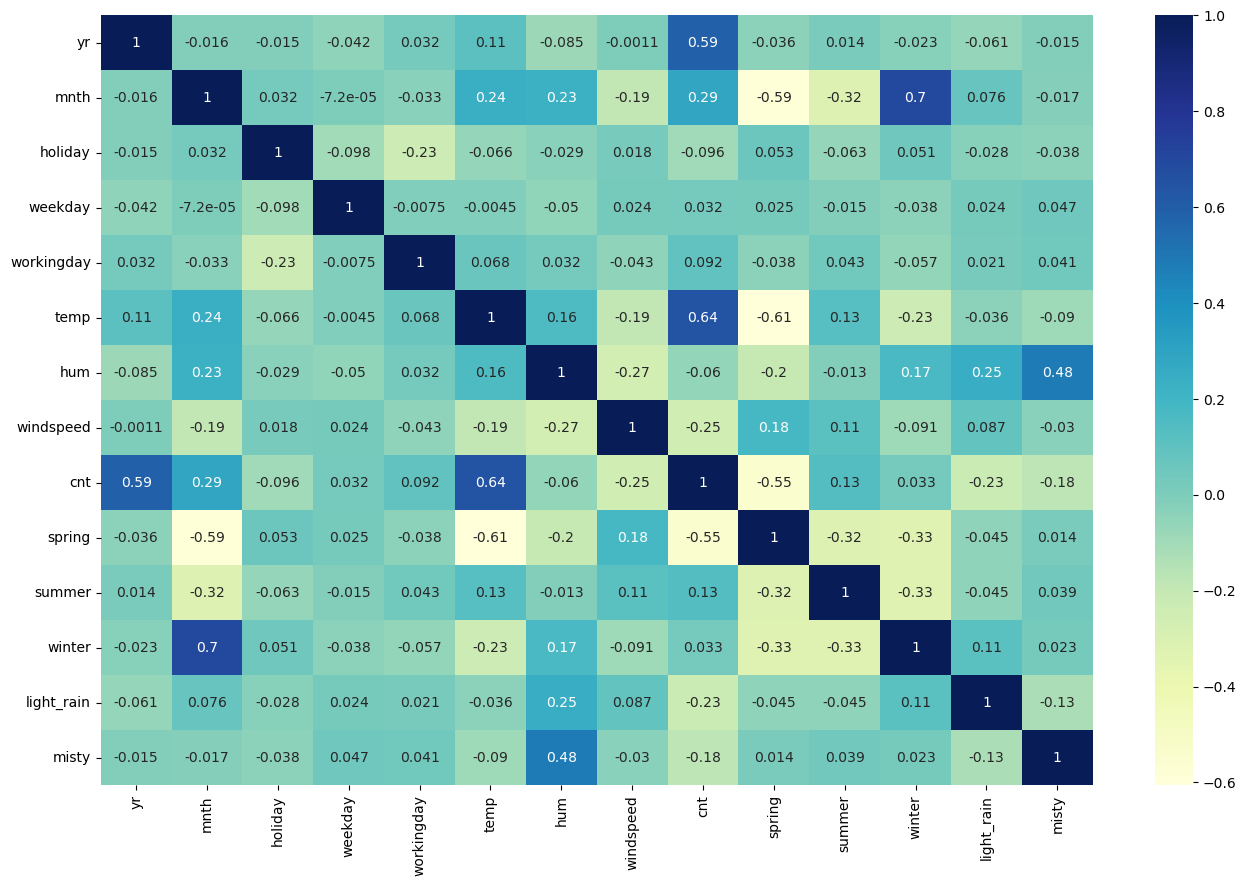

In [171]:
# Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [172]:
y_train = df_train.pop('cnt')
X_train = df_train

In [173]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.239942
yr            0.232093
mnth          0.012629
holiday      -0.064654
weekday       0.048288
workingday    0.018797
temp          0.492661
hum          -0.125327
windspeed    -0.180300
spring       -0.069112
summer        0.046820
winter        0.086767
light_rain   -0.248565
misty        -0.058301
dtype: float64

In [174]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.31e-183
Time:                        20:38:43   Log-Likelihood:                 495.91
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     496   BIC:                            -904.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2399      0.039      6.215      0.0

The data looks good from this perspective

### Checking VIF

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [176]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [177]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
6          hum  30.18
5         temp  16.84
1         mnth  12.53
7    windspeed   4.80
10      winter   4.51
8       spring   4.42
4   workingday   3.20
3      weekday   3.16
9       summer   2.62
12       misty   2.32
0           yr   2.08
11  light_rain   1.25
2      holiday   1.10

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As we can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `mnth` as it has a very high p-value of `0.624`. I am going to drop this variable.

In [178]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('mnth', 1,)

In [179]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [180]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.00e-184
Time:                        20:43:00   Log-Likelihood:                 495.78
No. Observations:                 510   AIC:                            -965.6
Df Residuals:                     497   BIC:                            -910.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2459      0.037      6.718      0.0

In [181]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5          hum  27.38
4         temp  15.70
6    windspeed   4.69
7       spring   3.90
3   workingday   3.19
2      weekday   3.11
9       winter   3.11
11       misty   2.28
8       summer   2.27
0           yr   2.08
10  light_rain   1.24
1      holiday   1.10

### Dropping the Variable and Updating the Model

Since `hum` is having very high VIF, we will drop that as it won't be much use in our analysis.

In [182]:
X = X.drop('hum', 1)

In [183]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [184]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          9.96e-184
Time:                        20:44:58   Log-Likelihood:                 490.61
No. Observations:                 510   AIC:                            -957.2
Df Residuals:                     498   BIC:                            -906.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1813      0.031      5.892      0.0

In [185]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4         temp  5.26
5    windspeed  4.63
3   workingday  3.15
2      weekday  3.10
6       spring  2.28
0           yr  2.07
7       summer  1.85
8       winter  1.75
10       misty  1.54
1      holiday  1.10
9   light_rain  1.08

Since `temp` is also having very high VIF, it would be better to remove it from the dataset

In [188]:
X = X.drop('temp', 1)

In [189]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [190]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     160.9
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          4.20e-149
Time:                        20:51:58   Log-Likelihood:                 405.95
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     499   BIC:                            -743.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5571      0.018     31.409      0.0

In [191]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4   windspeed  3.96
2     weekday  2.65
3  workingday  2.61
5      spring  1.90
0          yr  1.86
6      summer  1.85
7      winter  1.71
9       misty  1.53
8  light_rain  1.08
1     holiday  1.07

Note: Eventhough `workingday` seem to have a moderately strong p-value, I won't be dropping it, as it feels like that value would be somewhat useful in this analysis. We will proceed with making our predictions using this model.

## Residual Analysis of the train data

In [192]:
y_train_cnt = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

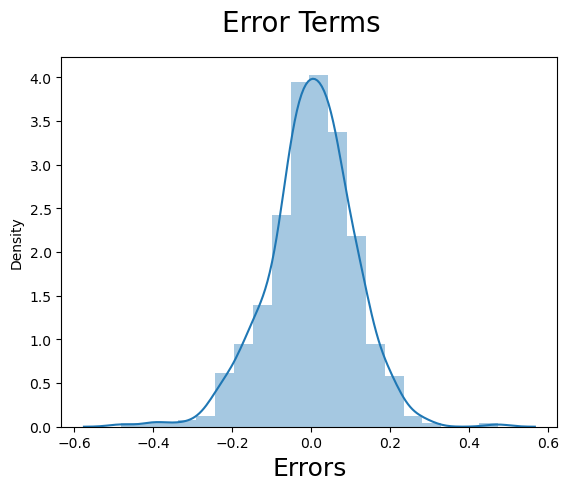

In [193]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [196]:
num_vars = ['mnth', 'weekday', 'temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [197]:
df_test.describe()

yr        mnth     holiday     weekday  workingday        temp  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.497717    0.036530    0.503044    0.698630    0.558941   
std      0.500722    0.311080    0.188034    0.331402    0.459904    0.233698   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.046591   
25%      0.000000    0.272727    0.000000    0.166667    0.000000    0.354650   
50%      0.000000    0.454545    0.000000    0.500000    1.000000    0.558691   
75%      1.000000    0.727273    0.000000    0.833333    1.000000    0.759096   
max      1.000000    1.000000    1.000000    1.000000    1.000000    0.984424   

              hum   windspeed         cnt      spring      summer      winter  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.638508    0.313350    0.520592    0.255708    0.264840    0.232877   
std      0.148974    0.159947    0.218435    0.437258    0.442259    0.423633   
min      0.261915   -0.042808    0.048205    0.000000    0.000000    0.000000   
25%      0.527265    0.198517    0.377531    0.000000    0.000000    0.000000   
50%      0.627737    0.299459    0.524275    0.000000    0.000000    0.000000   
75%      0.743928    0.403048    0.672745    1.000000    1.000000    0.000000   
max      1.002146    0.807474    0.963300    1.000000    1.000000    1.000000   

       light_rain       misty  
count  219.000000  219.000000  
mean     0.027397    0.319635  
std      0.163612    0.467403  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000    1.000000  
max      1.000000    1.000000

#### Dividing into X_test and y_test

In [199]:
y_test = df_test.pop('cnt')
X_test = df_test

In [201]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)
X_test_m4.head()

const  yr      mnth  holiday   weekday  workingday      temp       hum  \
184    1.0   0  0.545455        1  0.166667           0  0.831783  0.657364   
535    1.0   1  0.454545        0  0.500000           1  0.901354  0.610133   
299    1.0   0  0.818182        0  0.666667           1  0.511964  0.837699   
221    1.0   0  0.636364        0  0.500000           1  0.881625  0.437098   
152    1.0   0  0.454545        0  0.666667           1  0.817246  0.314298   

     windspeed  spring  summer  winter  light_rain  misty  
184   0.084219       0       0       0           0      1  
535   0.153728       0       1       0           0      0  
299   0.334206       0       0       1           0      1  
221   0.339570       0       0       0           0      0  
152   0.537414       0       1       0           0      0

In [202]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m4 = X_test_m4.drop(["temp", "hum", "mnth"], axis = 1)

In [204]:
# Making predictions using the final model

y_pred_m4 = lr_3.predict(X_test_m4)

## Model Evaluation

Finding the R-squared of the test set

In [205]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.7450301154629462

#### As we can see, the R2 score for the test set is `74.5%`, where it was `76.3%` on the train set. This is a very reasonable value.

Text(0, 0.5, 'y_pred_m4')

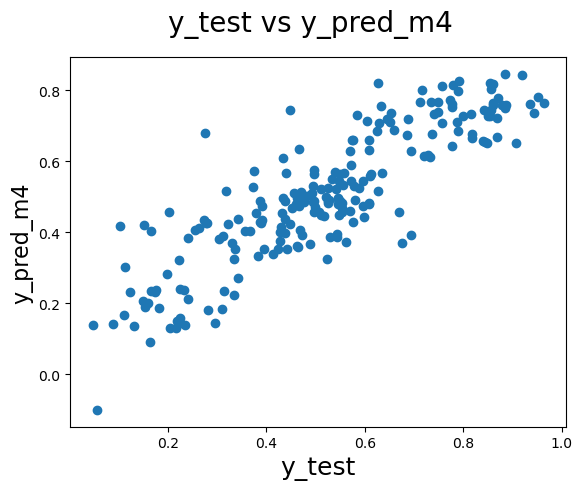

In [206]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred_m4', fontsize = 20)           # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_m4', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ cnt = 0.248  \times  yr + 0.05  \times  weekday + 0.021 \times workingday - 0.069 \times holiday - 0.176 \times windspeed - 0.313 \times spring - 0.058 \times summer - 0.084 \times winter - 0.296 \times light_rain - 0.090 \times misty $


#### This shows which are the factors that affect the total count of bike users
`yr` is the major contributor here, as it has the highest coefficient, followed by `weekday`, `workingday` etc.
There are other factors that negatively affect the cnt as well such as `windspeed`, `spring`, `light_rain` etc.

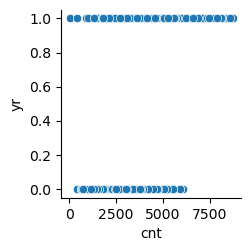

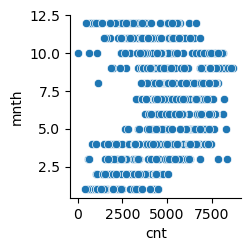

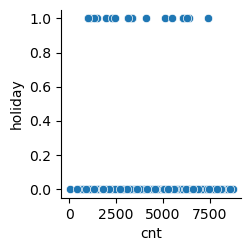

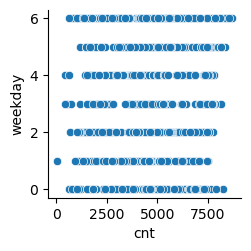

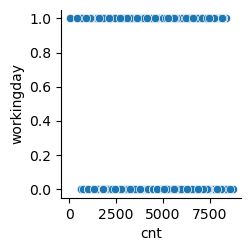

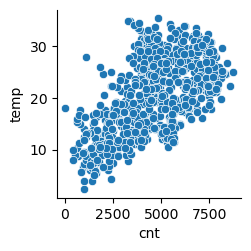

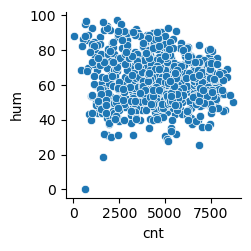

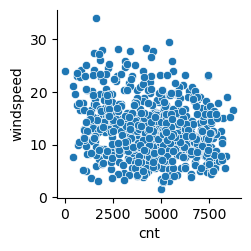

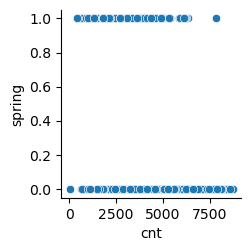

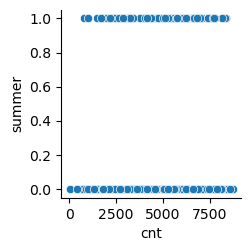

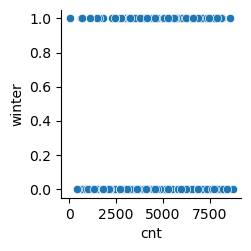

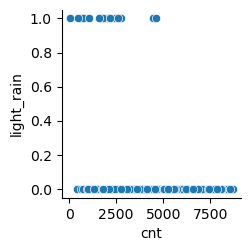

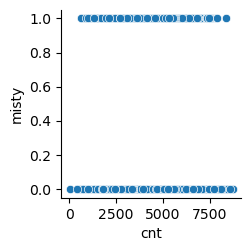

In [208]:
y_variables = [col for col in data.columns if col != 'cnt']
for y_var in y_variables:
    sns.pairplot(data, x_vars='cnt', y_vars=[y_var])
    plt.show()